In [83]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geopy.geocoders

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import pgeocode # Returns df with address details with postcode


print('Libraries imported.')

Libraries imported.


### London - Indian Coffee House - Business viability
* #### Location
* ####  - This will be entirley based on demographic on Ethnicity - Indian population in London
* ####  - We will take a look at the Ethinicity map of London for Indian population distribution

In [11]:
#pip install wikipedia

In [12]:
import pandas as pd
import wikipedia as wp
html = wp.page("Indian_community_of_London").html().encode("UTF-8")
try: 
    df = pd.read_html(html)[5]
except IndexError:
    df = pd.read_html(html)[0]
print(df)

        Community Percentage oftotal population
0  Greater London                          6.6%
1          Harrow                         26.4%
2        Hounslow                         19.0%
3           Brent                         18.6%
4       Redbridge                         16.4%
5          Ealing                         14.3%
6          Newham                         13.8%
7      Hillingdon                         13.4%


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Community                      8 non-null      object
 1   Percentage oftotal population  8 non-null      object
dtypes: object(2)
memory usage: 256.0+ bytes


In [14]:
df_1 = df.iloc[:,1].str.strip('%')

In [15]:
print(df_1)

0     6.6
1    26.4
2    19.0
3    18.6
4    16.4
5    14.3
6    13.8
7    13.4
Name: Percentage oftotal population, dtype: object


In [16]:
df['Percentage oftotal population'] = df_1
df.iloc[:, 1] = df.iloc[:, 1].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Community                      8 non-null      object 
 1   Percentage oftotal population  8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 256.0+ bytes


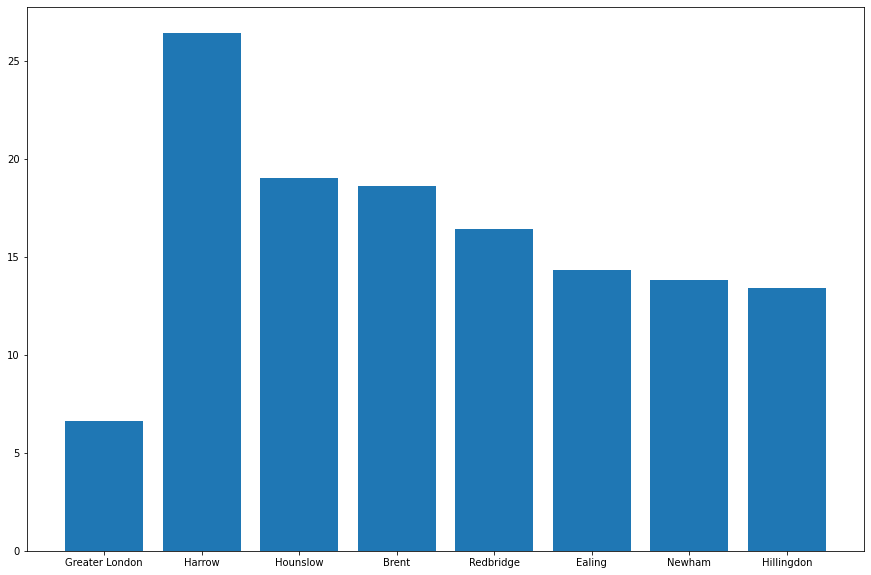

In [22]:
plt.figure(figsize = (15,10))
plt.bar(x = df.iloc[:, 0], height= (df.iloc[:, 1]))
plt.show()

### Above bar plot shows the percent of Indian community by Burrough 
* #### Harrow has Indian population followed by Hounslow, Brent, RedBridge

### Postcodes and Latlong detail to explore venues from Foursquare for existing cofeeshop types

In [23]:
html = wp.page("London_postal_district").html().encode("UTF-8")
try: 
    lnd_east = pd.read_html(html)[2]
except IndexError:
    df = pd.read_html(html)[0]
print(lnd_east)

  Postcode area     District[13]  \
0             E          Eastern   
1            EC  Eastern Central   
2             N         Northern   

               Postcode districts and district names  
0  E1 Head district E2 Bethnal Green E3 Bow E4 Ch...  
1  EC1 Head districtEC2 BishopsgateEC3 Fenchurch ...  
2  N1 Head district N2 East Finchley N3 Finchley ...  


In [24]:
lnd_east.iloc[:, 2]

0    E1 Head district E2 Bethnal Green E3 Bow E4 Ch...
1    EC1 Head districtEC2 BishopsgateEC3 Fenchurch ...
2    N1 Head district N2 East Finchley N3 Finchley ...
Name: Postcode districts and district names, dtype: object

In [25]:
print(lnd_east.iloc[0 , 2])

E1 Head district E2 Bethnal Green E3 Bow E4 Chingford E5 Clapton E6 East HamE7 Forest Gate E8 Hackney E9 Homerton E10 Leyton E11 LeytonstoneE12 Manor Park E13 Plaistow E14 Poplar E15 Stratford E16 Victoria Docks and North Woolwich E17 Walthamstow E18 Woodford and South Woodford E20 Olympic Park


#### East London contain Buroughs with Postal code ranging from E1 - E20
#### We make an array of the post code list and extract locations with LatLong data using *pgeocode* library

In [26]:
east_postcode = np.linspace(0,0,20)

east_postcode = east_postcode.astype('U256')

for i in range(0,20):
    tmp =  str('E'+ str(i+1))
    east_postcode[i] = tmp
    print(east_postcode[i])

east_postcode

E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14
E15
E16
E17
E18
E19
E20


array(['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11',
       'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20'],
      dtype='<U256')

In [ ]:
#tmp, tmp2 = lnd_east1[14].split('am')
#lnd_east1.insert(15, tmp2 )
#lnd_east1

In [ ]:
#tmp, tmp2 = lnd_east1[25].split('ne')
#lnd_east1.insert(26, tmp2 )
#lnd_east1

In [ ]:
#geolocator = Nominatim(user_agent="user_agent")
#geolocator.geocode({"postalcode": E1, 'countryRegion':'United Kingdom'})

In [29]:
pip install pgeocode

Note: you may need to restart the kernel to use updated packages.


In [31]:
nomi = pgeocode.Nominatim('GB')
e2 = nomi.query_postal_code("E2")
print(list(e2))

['E2', 'GB', 'Hackney, Bethnal Green, Tower Hamlets, Haggerston', 'England', 'ENG', 'Greater London', '11609024', None, None, 51.55, -0.055525, 4.0]


In [32]:
east_post_df = pd.DataFrame()
for i, val in enumerate(east_postcode):
    print(val)
    east_post_df[i] = nomi.query_postal_code(str(val))

E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14
E15
E16
E17
E18
E19
E20


In [33]:
east_post_df = east_post_df.T
east_post_df

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,E1,GB,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",England,ENG,Greater London,11609024,None,None,51.5138,-0.0617727,4
1,E2,GB,"Hackney, Bethnal Green, Tower Hamlets, Haggerston",England,ENG,Greater London,11609024,None,None,51.55,-0.055525,4
2,E3,GB,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",England,ENG,Greater London,11609024,None,None,51.525,-0.0265714,4
3,E4,GB,"Chingford, Highams Park, Gilwell Park, Hale En...",England,ENG,Greater London,11609024,None,None,51.6303,0.0005,4
4,E5,GB,"Upper Clapton, Clapton Park, Hackney Marshes, ...",England,ENG,Greater London,11609024,None,None,51.564,-0.0545167,4
5,E6,GB,"East Ham, Upton Park, Beckton, Cyprus",England,ENG,Greater London,11609024,None,None,51.5333,0.049325,4
6,E7,GB,"Forest Gate, Plashet, Upton, Wanstead Park",England,ENG,Greater London,11609024,None,None,51.5508,0.026475,4
7,E8,GB,"Dalston, Hackney, Shacklewell, Dalston Junction",England,ENG,Greater London,11609024,None,None,51.546,-0.0629,4
8,E9,GB,"South Hackney, Victoria Park, Hackney Wick, Ho...",England,ENG,Greater London,11609024,None,None,51.5404,-0.0414,4
9,E10,GB,"Leyton, Lea Bridge, Leyton Marshes",England,ENG,Greater London,11609024,None,None,51.5596,-0.0078,4


In [34]:
east_post_df = east_post_df.drop([18])
east_post_df

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,E1,GB,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",England,ENG,Greater London,11609024,None,None,51.5138,-0.0617727,4
1,E2,GB,"Hackney, Bethnal Green, Tower Hamlets, Haggerston",England,ENG,Greater London,11609024,None,None,51.55,-0.055525,4
2,E3,GB,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",England,ENG,Greater London,11609024,None,None,51.525,-0.0265714,4
3,E4,GB,"Chingford, Highams Park, Gilwell Park, Hale En...",England,ENG,Greater London,11609024,None,None,51.6303,0.0005,4
4,E5,GB,"Upper Clapton, Clapton Park, Hackney Marshes, ...",England,ENG,Greater London,11609024,None,None,51.564,-0.0545167,4
5,E6,GB,"East Ham, Upton Park, Beckton, Cyprus",England,ENG,Greater London,11609024,None,None,51.5333,0.049325,4
6,E7,GB,"Forest Gate, Plashet, Upton, Wanstead Park",England,ENG,Greater London,11609024,None,None,51.5508,0.026475,4
7,E8,GB,"Dalston, Hackney, Shacklewell, Dalston Junction",England,ENG,Greater London,11609024,None,None,51.546,-0.0629,4
8,E9,GB,"South Hackney, Victoria Park, Hackney Wick, Ho...",England,ENG,Greater London,11609024,None,None,51.5404,-0.0414,4
9,E10,GB,"Leyton, Lea Bridge, Leyton Marshes",England,ENG,Greater London,11609024,None,None,51.5596,-0.0078,4


In [39]:
east_post_df = east_post_df.drop(['community_name', 'community_code'], axis = 1)
east_post_df

,postal_code,country_code,place_name,state_name,state_code,county_name,latitude,longitude,accuracy
0,E1,GB,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",England,ENG,Greater London,51.5138,-0.0617727,4
1,E2,GB,"Hackney, Bethnal Green, Tower Hamlets, Haggerston",England,ENG,Greater London,51.55,-0.055525,4
2,E3,GB,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",England,ENG,Greater London,51.525,-0.0265714,4
3,E4,GB,"Chingford, Highams Park, Gilwell Park, Hale En...",England,ENG,Greater London,51.6303,0.0005,4
4,E5,GB,"Upper Clapton, Clapton Park, Hackney Marshes, ...",England,ENG,Greater London,51.564,-0.0545167,4
5,E6,GB,"East Ham, Upton Park, Beckton, Cyprus",England,ENG,Greater London,51.5333,0.049325,4
6,E7,GB,"Forest Gate, Plashet, Upton, Wanstead Park",England,ENG,Greater London,51.5508,0.026475,4
7,E8,GB,"Dalston, Hackney, Shacklewell, Dalston Junction",England,ENG,Greater London,51.546,-0.0629,4
8,E9,GB,"South Hackney, Victoria Park, Hackney Wick, Ho...",England,ENG,Greater London,51.5404,-0.0414,4
9,E10,GB,"Leyton, Lea Bridge, Leyton Marshes",England,ENG,Greater London,51.5596,-0.0078,4


In [35]:
east_post_df = east_post_df.drop(['county_code'], axis = 1)
east_post_df

,postal_code,country_code,place_name,state_name,state_code,county_name,community_name,community_code,latitude,longitude,accuracy
0,E1,GB,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",England,ENG,Greater London,None,None,51.5138,-0.0617727,4
1,E2,GB,"Hackney, Bethnal Green, Tower Hamlets, Haggerston",England,ENG,Greater London,None,None,51.55,-0.055525,4
2,E3,GB,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",England,ENG,Greater London,None,None,51.525,-0.0265714,4
3,E4,GB,"Chingford, Highams Park, Gilwell Park, Hale En...",England,ENG,Greater London,None,None,51.6303,0.0005,4
4,E5,GB,"Upper Clapton, Clapton Park, Hackney Marshes, ...",England,ENG,Greater London,None,None,51.564,-0.0545167,4
5,E6,GB,"East Ham, Upton Park, Beckton, Cyprus",England,ENG,Greater London,None,None,51.5333,0.049325,4
6,E7,GB,"Forest Gate, Plashet, Upton, Wanstead Park",England,ENG,Greater London,None,None,51.5508,0.026475,4
7,E8,GB,"Dalston, Hackney, Shacklewell, Dalston Junction",England,ENG,Greater London,None,None,51.546,-0.0629,4
8,E9,GB,"South Hackney, Victoria Park, Hackney Wick, Ho...",England,ENG,Greater London,None,None,51.5404,-0.0414,4
9,E10,GB,"Leyton, Lea Bridge, Leyton Marshes",England,ENG,Greater London,None,None,51.5596,-0.0078,4


In [40]:
east_post_df.columns

Index(['postal_code', 'country_code', 'place_name', 'state_name', 'state_code',
       'county_name', 'latitude', 'longitude', 'accuracy'],
      dtype='object')

### We will explore neighborhoods stratford and Newham for coffee shops - with less population of Indians to gain some competitive advantage

#### We will visulise the local area in folium and add markers in cofee house locations

In [77]:
geolocator = Nominatim(user_agent="tr_explorer")

latitude = east_post_df.iloc[14 , 6]
longitude = east_post_df.iloc[14, 7]
print('The geograpical coordinate of Stratford, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Stratford, London are 51.5333, 0.0.


#### Using geolocaotor reverse to get address from lat long values for each post code

### Folium map of neighborhood in Stratford, London

In [43]:
map_stratford = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, place_name, county in zip(east_post_df['latitude'], east_post_df['longitude'], east_post_df['place_name'], east_post_df['county_name']):
    label = '{}, {}'.format(county, place_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stratford)  
    
map_stratford

### Exploring neighborhood with Foursquare api

In [44]:
CLIENT_ID = 'URC3HEHN0GIOOXFIMZYYLQFJDBFFCLMJGCCIM5Y1WTDNPIH3' # your Foursquare ID
CLIENT_SECRET = 'FFFCUB3GQKHQRAKV1TD0NRXBQEFYSYFMR0VACHBVK4J13PRU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: URC3HEHN0GIOOXFIMZYYLQFJDBFFCLMJGCCIM5Y1WTDNPIH3
CLIENT_SECRET:FFFCUB3GQKHQRAKV1TD0NRXBQEFYSYFMR0VACHBVK4J13PRU


#### Neighborhood near Stratford

In [45]:
stratford_data = east_post_df.iloc[14]
stratford_data['place_name']

'Stratford, Pudding Mill Lane, Stratford Marsh, Temple Mills'

In [46]:
stratford_data

postal_code                                                   E15
country_code                                                   GB
place_name      Stratford, Pudding Mill Lane, Stratford Marsh,...
state_name                                                England
state_code                                                    ENG
county_name                                        Greater London
latitude                                                  51.5333
longitude                                                       0
accuracy                                                        4
Name: 14, dtype: object

In [47]:
neighborhood_latitude = stratford_data['latitude'] # neighborhood latitude value
neighborhood_longitude = stratford_data['longitude'] # neighborhood longitude value

neighborhood_name = stratford_data['place_name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Stratford, Pudding Mill Lane, Stratford Marsh, Temple Mills are 51.5333, 0.0.


#### Explore the nearby venues within 500 metres

In [48]:
LIMIT = 100
radius = 750
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [49]:
strat_results = requests.get(url).json()
strat_results

{'meta': {'code': 200, 'requestId': '60bc4484ef98392596e04d0a'},
 'response': {'headerLocation': 'Stratford and New Town',
  'headerFullLocation': 'Stratford and New Town, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 20,
  'suggestedBounds': {'ne': {'lat': 51.54005000675,
    'lng': 0.010830799503423439},
   'sw': {'lat': 51.52654999324999, 'lng': -0.010830799503423439}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c8bbe925e048cfa9a19c6cd',
       'name': 'Pie Crust Cafe',
       'location': {'address': '273 High St',
        'lat': 51.536489085536914,
        'lng': -0.004051344410566316,
        'labeledLatLngs': [{'label': 'display',
          'lat': 51.536489085536914,
          'lng': -0.004051344410566316}],
        'distance': 452

In [50]:
LIMIT = 100
radius = 750
url_tips = 'https://api.foursquare.com/v2/tips/details?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [51]:
strat_results_tips = requests.get(url_tips).json()
strat_results_tips

{'meta': {'code': 400,
  'errorType': 'param_error',
  'errorDetail': 'Must provide a valid Tip ID',
  'requestId': '60bc449549d56e7e7e886874'},
 'response': {}}

In [52]:
## Function to extract venues

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [53]:
## Creating data frame json file

stratvenues = strat_results['response']['groups'][0]['items']
    
stratnearby_venues = json_normalize(stratvenues) # flatten JSON

# filter columns
filtered_columns = ['venue.id', 'venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
stratnearby_venues =stratnearby_venues.loc[:, filtered_columns]

# filter the category for each row
stratnearby_venues['venue.categories'] = stratnearby_venues.apply(get_category_type, axis=1)

# clean columns
stratnearby_venues.columns = [col.split(".")[-1] for col in stratnearby_venues.columns]

stratnearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,lat,lng
0,4c8bbe925e048cfa9a19c6cd,Pie Crust Cafe,Thai Restaurant,51.536489,-0.004051
1,5286441f11d22cd8c5a07fbb,Sawmill,Café,51.539367,0.004074
2,4e0ef23022711665f619a691,The Greenway,Trail,51.530350,0.001172
3,4bafbc5bf964a5205f1c3ce3,Rial Lifestyle Café,Café,51.527761,0.005202
4,5058838ee4b04bd69f3722de,The Westbridge,Hotel,51.537374,-0.002624
5,4dfdff56d4c001cca3719fcc,Stratford Park,Park,51.538380,0.006876
6,4c128072a5eb76b0b44bbeb7,Three Mills Green,Park,51.528840,-0.006834
7,4ac518d4f964a520b1a720e3,Discover Children's Story Centre,General Entertainment,51.539107,-0.000351
8,4cc8750c5c7e8cfa203b3e66,Station Fish Bar,Fish & Chips Shop,51.527777,0.005063
9,4ccf12e1ee23a143d2e52fa8,Abbey Road DLR Station,Light Rail Station,51.532469,0.003716


In [54]:
## Num of venues returned by foursquare
print('{} venues were returned by Foursquare.'.format(stratnearby_venues.shape[0]))

20 venues were returned by Foursquare.


### Extracting venues for all the markers in East London

In [55]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [56]:
# type your answer here
east_london_venues = getNearbyVenues(names = east_post_df['place_name'], latitudes = east_post_df['latitude'], longitudes = east_post_df['longitude'])

Whitechapel, Rotherhithe, Stepney Green, Stepney, Aldgate East, Shoreditch, Commercial Road, Wapping, Spitalfields, Mile End Road, Shadwell
Hackney, Bethnal Green, Tower Hamlets, Haggerston
Mile End, Old Ford, Devons Road, Bow Road, Bow, Bromley by Bow, Bow Church
Chingford, Highams Park, Gilwell Park, Hale End, Sewardstone, Chingford Green, Chingford Hatch
Upper Clapton, Clapton Park, Hackney Marshes, Lower Clapton, Clapton, Lea Bridge
East Ham, Upton Park, Beckton, Cyprus
Forest Gate, Plashet, Upton, Wanstead Park
Dalston, Hackney, Shacklewell, Dalston Junction
South Hackney, Victoria Park, Hackney Wick, Homerton
Leyton, Lea Bridge, Leyton Marshes
Snaresbrook, Wanstead, Leytonstone
Manor Park, Little Ilford, Aldersbrook
West Ham, Plaistow, Newham
Cubitt Town, Canary Wharf, Limehouse, Poplar, Millwall, All Saints, Blackwall, Island Gardens, South Quay, East India, Mudchute, East India Dock Road, London Arena, West India Quay, Coldharbour, Heron Quays, Westferry
Stratford, Pudding Mill

In [57]:
east_london_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4ac518d7f964a5206aa820e3,Lahore Kebab House,51.514483,-0.062912,Kebab Restaurant
1,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4d8cabc66174a09350509ee3,Lahore One,51.514725,-0.059399,Indian Restaurant
2,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4fc2280ce4b06f6d2374380f,The Battle of Cable Street Mural,51.510922,-0.058684,Street Art
3,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,5a70e9a7d41bb754fe93b13f,Amber,51.513820,-0.068825,Middle Eastern Restaurant
4,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4ad0972ff964a520a0d820e3,Tayyabs,51.517240,-0.063476,North Indian Restaurant


In [58]:
east_london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
"Chingford, Highams Park, Gilwell Park, Hale End, Sewardstone, Chingford Green, Chingford Hatch",10,10,10,10,10,10,10
"Cubitt Town, Canary Wharf, Limehouse, Poplar, Millwall, All Saints, Blackwall, Island Gardens, South Quay, East India, Mudchute, East India Dock Road, London Arena, West India Quay, Coldharbour, Heron Quays, Westferry",22,22,22,22,22,22,22
"Dalston, Hackney, Shacklewell, Dalston Junction",43,43,43,43,43,43,43
"East Ham, Upton Park, Beckton, Cyprus",22,22,22,22,22,22,22
"Forest Gate, Plashet, Upton, Wanstead Park",10,10,10,10,10,10,10
"Hackney, Bethnal Green, Tower Hamlets, Haggerston",63,63,63,63,63,63,63
"Hackney, Waltham Forest, Tower Hamlets, Newham",71,71,71,71,71,71,71
"Leyton, Lea Bridge, Leyton Marshes",38,38,38,38,38,38,38
"Manor Park, Little Ilford, Aldersbrook",4,4,4,4,4,4,4


### Venue unique categories

In [59]:
print('There are {} uniques categories.'.format(len(east_london_venues['Venue Category'].unique())))

There are 138 uniques categories.


#### Below is quick list of Coffee shops in all of East London

In [60]:
east_london_cof_shop = east_london_venues[east_london_venues['Venue Category']=='Coffee Shop']
east_london_cof_shop

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
22,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4c0a225dffb8c9b6c9106b61,Costa Coffee,51.516190,-0.062046,Coffee Shop
32,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4c55c3a11b46c9b6a5cdcad0,Café Marrone,51.511685,-0.056377,Coffee Shop
59,"Hackney, Bethnal Green, Tower Hamlets, Haggerston",51.5500,-0.055525,4c39c8f93849c928e7c7c1b1,Coffee8,51.547573,-0.054663,Coffee Shop
66,"Hackney, Bethnal Green, Tower Hamlets, Haggerston",51.5500,-0.055525,4fda0cff6b7475e93c4b9c1a,Brew for Two,51.546993,-0.051329,Coffee Shop
71,"Hackney, Bethnal Green, Tower Hamlets, Haggerston",51.5500,-0.055525,513b37f5e4b0f9297ab8a4d4,119 Lower Clapton,51.552351,-0.052790,Coffee Shop
117,"Chingford, Highams Park, Gilwell Park, Hale En...",51.6303,0.000500,4c77e8981e71a1cd47f40dea,Caffè Nero,51.631661,0.004759,Coffee Shop
118,"Chingford, Highams Park, Gilwell Park, Hale En...",51.6303,0.000500,55feab0a498ed76a1101b552,Costa Coffee,51.631299,0.003641,Coffee Shop
142,"East Ham, Upton Park, Beckton, Cyprus",51.5333,0.049325,4fa3ca90e4b0fd4c3dbc5505,Costa Coffee,51.534517,0.053365,Coffee Shop
180,"Dalston, Hackney, Shacklewell, Dalston Junction",51.5460,-0.062900,4e5bac8c22718867150fe9e5,Healthy Stuff,51.548182,-0.065408,Coffee Shop
253,"Leyton, Lea Bridge, Leyton Marshes",51.5596,-0.007800,4b92d960f964a520582134e3,Delicatessen Palmeira,51.558790,-0.007203,Coffee Shop


In [64]:
def getNearbyVenuesMenu(venues, venue_ids):
    
    venue_menu_list=[]
    for venue, venue_id in zip(venues, venue_ids):
        print(venue)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues={}/VENUE_ID={}/menu?&client_id={}&client_secret={}&v={}'.format(
            venue,
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION
            )
            
        # make the GET request
        menu_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [65]:
# one hot encoding
eastl_onehot = pd.get_dummies(east_london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
eastl_onehot['Neighborhood'] = east_london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [eastl_onehot.columns[-1]] + list(eastl_onehot.columns[:-1])
eastl_onehot = eastl_onehot[fixed_columns]

eastl_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,Airport Ticket Counter,Art Gallery,Arts & Entertainment,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Betting Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Stop,Butcher,Café,Camera Store,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Creperie,Currency Exchange,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gelato Shop,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Lake,Laser Tag,Latin American Restaurant,Light Rail Station,Market,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Multiplex,Music Venue,Nature Preserve,North Indian Restaurant,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Platform,Playground,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,River,Road,Sake Bar,Sandwich Place,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soccer Stadium,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Yoga Studio
0,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
eastl_grouped = eastl_onehot.groupby('Neighborhood').mean().reset_index()
eastl_grouped

,Neighborhood,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,Airport Ticket Counter,Art Gallery,Arts & Entertainment,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Betting Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Stop,Butcher,Café,Camera Store,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Creperie,Currency Exchange,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gelato Shop,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Lake,Laser Tag,Latin American Restaurant,Light Rail Station,Market,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Multiplex,Music Venue,Nature Preserve,North Indian Restaurant,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Platform,Playground,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,River,Road,Sake Bar,Sandwich Place,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soccer Stadium,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Yoga Studio
0,"Chingford, Highams Park, Gilwell Park, Hale En...",0.000000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.100000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Cubitt Town, Canary Wharf, Limehouse, Poplar, ...",0.000000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.045455,0.000000,0.045455,0.000000,0.000000,0.000000,0.090909,0.045455,0.000000,0.090909,0.045455,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [67]:
# Top 5 common values
num_top_venues = 5

for hood in eastl_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = eastl_grouped[eastl_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Chingford, Highams Park, Gilwell Park, Hale End, Sewardstone, Chingford Green, Chingford Hatch----
                venue  freq
0         Coffee Shop   0.2
1  Italian Restaurant   0.1
2       Grocery Store   0.1
3   Convenience Store   0.1
4      Sandwich Place   0.1


----Cubitt Town, Canary Wharf, Limehouse, Poplar, Millwall, All Saints, Blackwall, Island Gardens, South Quay, East India, Mudchute, East India Dock Road, London Arena, West India Quay, Coldharbour, Heron Quays, Westferry----
               venue  freq
0  Indian Restaurant  0.09
1     Sandwich Place  0.09
2              Hotel  0.09
3        Yoga Studio  0.05
4    Harbor / Marina  0.05


----Dalston, Hackney, Shacklewell, Dalston Junction----
                        venue  freq
0                        Café  0.16
1                         Pub  0.12
2  Modern European Restaurant  0.05
3                   Wine Shop  0.05
4               Grocery Store  0.05


----East Ham, Upton Park, Beckton, Cyprus----
                 

In [68]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [69]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_strat = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_strat['Neighborhood'] = eastl_grouped['Neighborhood']

for ind in np.arange(eastl_grouped.shape[0]):
    neighborhoods_venues_sorted_strat.iloc[ind, 1:] = return_most_common_venues(eastl_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_strat.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Chingford, Highams Park, Gilwell Park, Hale En...",Coffee Shop,Pub,Grocery Store,Park,Sandwich Place,Café,Fast Food Restaurant,Convenience Store,Italian Restaurant,Gym
1,"Cubitt Town, Canary Wharf, Limehouse, Poplar, ...",Hotel,Indian Restaurant,Sandwich Place,Yoga Studio,Supermarket,Bar,Chinese Restaurant,Fish & Chips Shop,Grocery Store,Gym
2,"Dalston, Hackney, Shacklewell, Dalston Junction",Café,Pub,Grocery Store,Hotel,Wine Shop,Italian Restaurant,Restaurant,Modern European Restaurant,Platform,Pool
3,"East Ham, Upton Park, Beckton, Cyprus",Pub,Fast Food Restaurant,Clothing Store,Jewelry Store,Supermarket,Furniture / Home Store,Optical Shop,Electronics Store,Sporting Goods Shop,Bakery
4,"Forest Gate, Plashet, Upton, Wanstead Park",Grocery Store,Pub,Fast Food Restaurant,Market,Bakery,Café,Chinese Restaurant,Train Station,Discount Store,Dive Bar


### K-Means Clustering 

In [75]:
# set number of clusters
kclusters = 5

eastl_grouped_clustering = eastl_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_strat = KMeans(n_clusters = kclusters, random_state=0).fit(eastl_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_strat.labels_[0:10] 

array([1, 0, 1, 1, 2, 1, 1, 1, 3, 4], dtype=int32)

In [76]:
east_london_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4ac518d7f964a5206aa820e3,Lahore Kebab House,51.514483,-0.062912,Kebab Restaurant
1,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4d8cabc66174a09350509ee3,Lahore One,51.514725,-0.059399,Indian Restaurant
2,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4fc2280ce4b06f6d2374380f,The Battle of Cable Street Mural,51.510922,-0.058684,Street Art
3,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,5a70e9a7d41bb754fe93b13f,Amber,51.513820,-0.068825,Middle Eastern Restaurant
4,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4ad0972ff964a520a0d820e3,Tayyabs,51.517240,-0.063476,North Indian Restaurant
5,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,5262c65b11d2099bed712005,Qbic Hotel,51.516183,-0.067454,Hotel
6,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,5a05c8ca79187117266f6e86,Calumet / Wex Photographic,51.515057,-0.067522,Camera Store
7,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,5b08819ff62f2b002c23eb09,New Road Hotel,51.517575,-0.062658,Hotel
8,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,5902424b780eee19af166669,More Yoga Aldgate,51.515574,-0.067395,Yoga Studio
9,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,57ff9f16d67c2cd285d7c21e,Lmnh Kitchen,51.512814,-0.067084,Café


In [79]:
### Clustering with Top 10 venues in each cluster

# add clustering labels
neighborhoods_venues_sorted_strat.insert(0, 'Cluster Labels', kmeans_strat.labels_)

strat_merged = east_london_venues

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
strat_merged = strat_merged.join(neighborhoods_venues_sorted_strat.set_index('Neighborhood'), on='Neighborhood')

strat_merged.head() # check the last columns!

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4ac518d7f964a5206aa820e3,Lahore Kebab House,51.514483,-0.062912,Kebab Restaurant,0,Hotel,Gym / Fitness Center,Grocery Store,Indian Restaurant,Pub,Coffee Shop,Creperie,Sandwich Place,Bus Stop,Café
1,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4d8cabc66174a09350509ee3,Lahore One,51.514725,-0.059399,Indian Restaurant,0,Hotel,Gym / Fitness Center,Grocery Store,Indian Restaurant,Pub,Coffee Shop,Creperie,Sandwich Place,Bus Stop,Café
2,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4fc2280ce4b06f6d2374380f,The Battle of Cable Street Mural,51.510922,-0.058684,Street Art,0,Hotel,Gym / Fitness Center,Grocery Store,Indian Restaurant,Pub,Coffee Shop,Creperie,Sandwich Place,Bus Stop,Café
3,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,5a70e9a7d41bb754fe93b13f,Amber,51.513820,-0.068825,Middle Eastern Restaurant,0,Hotel,Gym / Fitness Center,Grocery Store,Indian Restaurant,Pub,Coffee Shop,Creperie,Sandwich Place,Bus Stop,Café
4,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",51.5138,-0.061773,4ad0972ff964a520a0d820e3,Tayyabs,51.517240,-0.063476,North Indian Restaurant,0,Hotel,Gym / Fitness Center,Grocery Store,Indian Restaurant,Pub,Coffee Shop,Creperie,Sandwich Place,Bus Stop,Café


In [80]:
# create map
map_clusters_strat = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(strat_merged['Neighborhood Latitude'], strat_merged['Neighborhood Longitude'], strat_merged['Neighborhood'], strat_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_strat)
       
map_clusters_strat

## Examine each cluster

In [84]:
st_cluster1 = strat_merged.loc[strat_merged['Cluster Labels'] == 0, strat_merged.columns[[0] + list(range(8, 14))]]
st_cluster1.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",0,Hotel,Gym / Fitness Center,Grocery Store,Indian Restaurant,Pub
1,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",0,Hotel,Gym / Fitness Center,Grocery Store,Indian Restaurant,Pub
2,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",0,Hotel,Gym / Fitness Center,Grocery Store,Indian Restaurant,Pub
3,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",0,Hotel,Gym / Fitness Center,Grocery Store,Indian Restaurant,Pub
4,"Whitechapel, Rotherhithe, Stepney Green, Stepn...",0,Hotel,Gym / Fitness Center,Grocery Store,Indian Restaurant,Pub


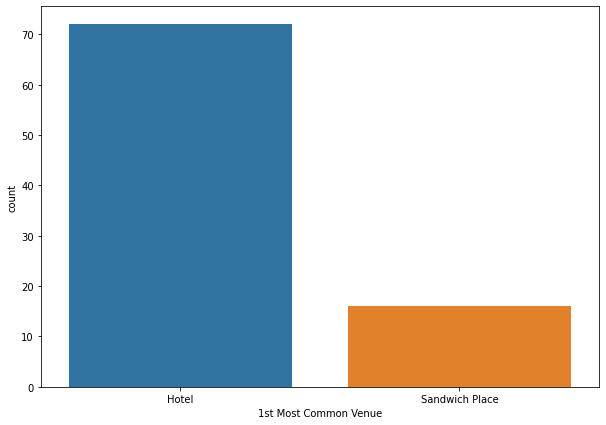

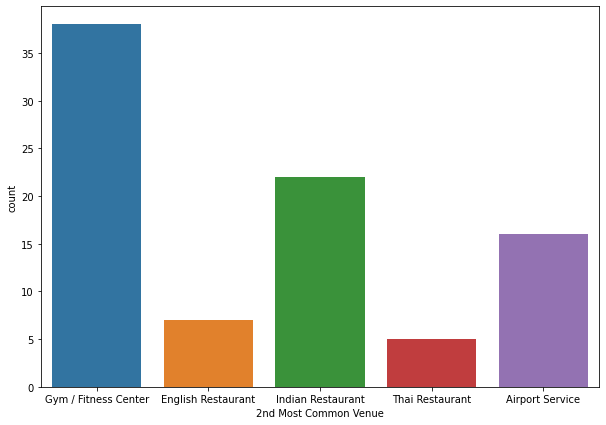

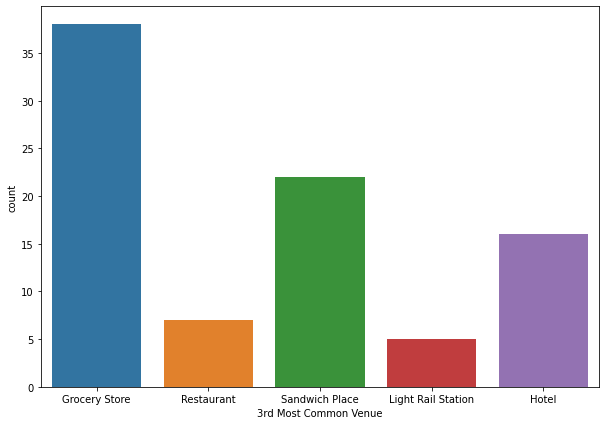

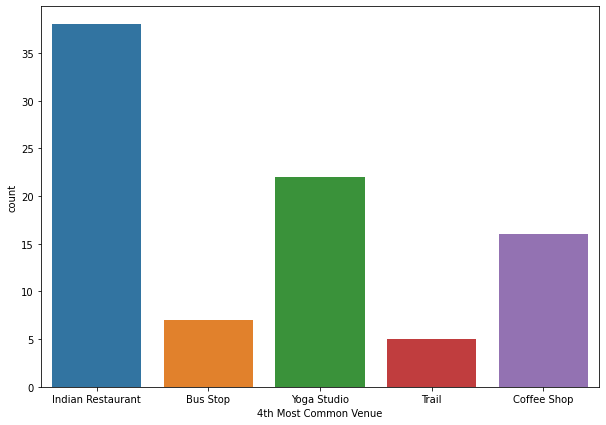

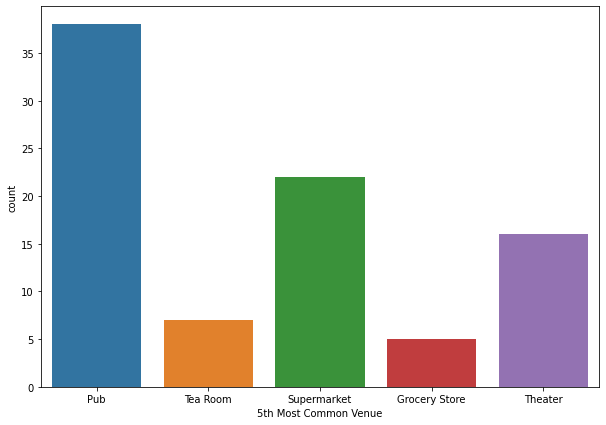

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

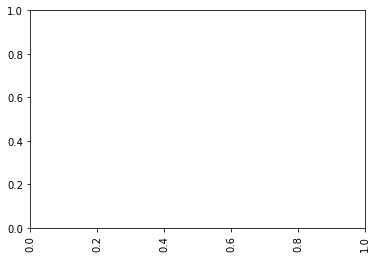

In [85]:
dpi = 200

for h in range(2, 7):
    plt.figure(figsize = (10,7))
    sns.countplot(data = st_cluster1, x = st_cluster1.iloc[:, h] )

plt.show()
plt.xticks(rotation = 90)

### Cluster 1 - Analysis
* #### The East London neighborhood include Whitechapel, Rotherhithe, Snaresbrook, Wanstead, Cubitt Town, Canary Wharf, Stratford, Pudding Mill Lane
* #### Further clustering is based on Ranking of Similar Common venues at each of the Neighborhood:
* ####   **Top venues being Hotel, Gym,Fitness centre, Grocery store, Indian Restaurant, Pub**

## Cluster 2

In [86]:
st_cluster2 = strat_merged.loc[strat_merged['Cluster Labels'] == 1, strat_merged.columns[[0] + list(range(8, 14))]]
st_cluster2.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
38,"Hackney, Bethnal Green, Tower Hamlets, Haggerston",1,Pub,Café,Brewery,Coffee Shop,Vegetarian / Vegan Restaurant
39,"Hackney, Bethnal Green, Tower Hamlets, Haggerston",1,Pub,Café,Brewery,Coffee Shop,Vegetarian / Vegan Restaurant
40,"Hackney, Bethnal Green, Tower Hamlets, Haggerston",1,Pub,Café,Brewery,Coffee Shop,Vegetarian / Vegan Restaurant
41,"Hackney, Bethnal Green, Tower Hamlets, Haggerston",1,Pub,Café,Brewery,Coffee Shop,Vegetarian / Vegan Restaurant
42,"Hackney, Bethnal Green, Tower Hamlets, Haggerston",1,Pub,Café,Brewery,Coffee Shop,Vegetarian / Vegan Restaurant


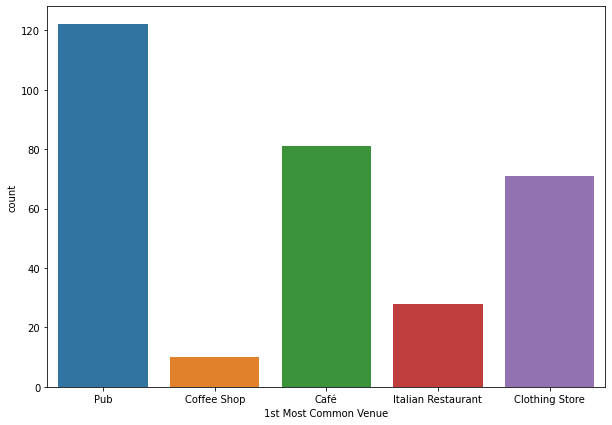

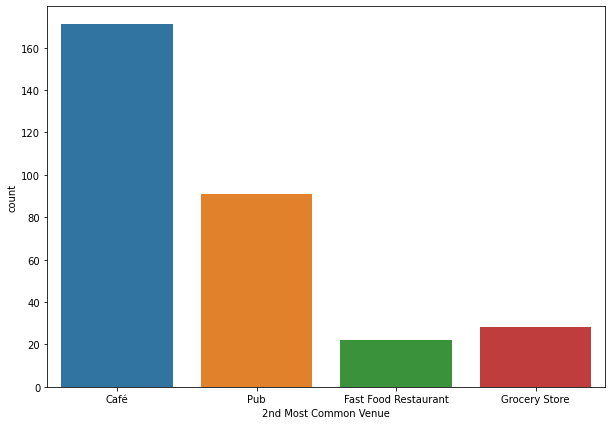

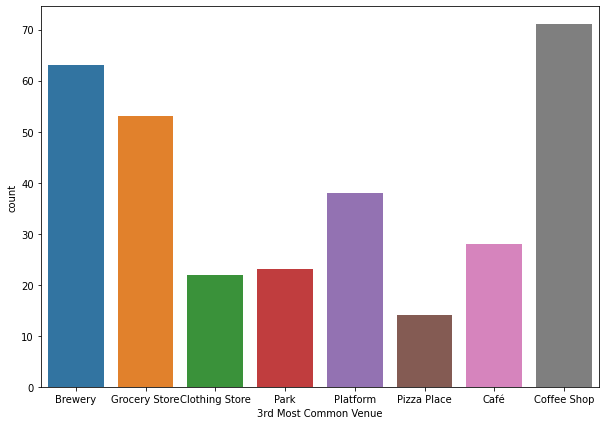

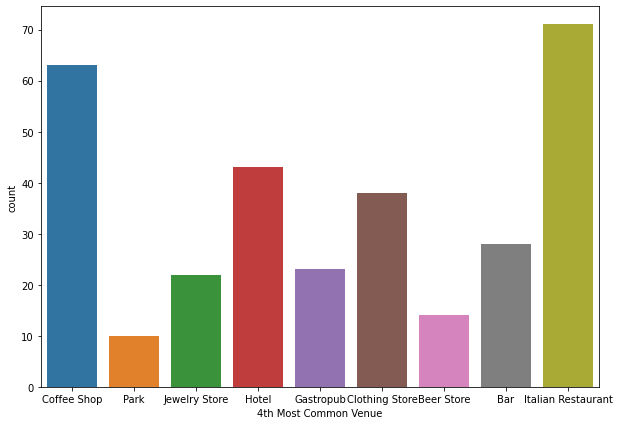

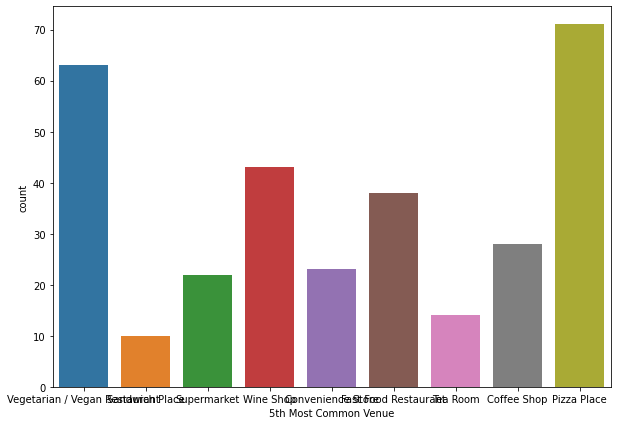

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

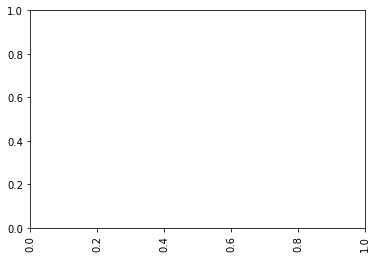

In [89]:
dpi = 200

for h in range(2, 7):
    plt.figure(figsize = (10,7))
    sns.countplot(data = st_cluster2, x = st_cluster2.iloc[:, h] )

plt.show()
plt.xticks(rotation = 90)

In [90]:
st_cluster2.iloc[:, 2:].value_counts()

1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  5th Most Common Venue        
Clothing Store         Café                   Coffee Shop            Italian Restaurant     Pizza Place                      71
Pub                    Café                   Brewery                Coffee Shop            Vegetarian / Vegan Restaurant    63
Café                   Pub                    Grocery Store          Hotel                  Wine Shop                        43
                                              Platform               Clothing Store         Fast Food Restaurant             38
Italian Restaurant     Grocery Store          Café                   Bar                    Coffee Shop                      28
Pub                    Café                   Park                   Gastropub              Convenience Store                23
                       Fast Food Restaurant   Clothing Store         Jewelry Store          Supermarket       

### Cluster 2 - Analysis
* #### The Neighborhoods in this cluster include Hackney, Bethnal Green, Tower Hamlets, Haggerston, East Ham, Beckton, Cyprus
* #### As per above graph and value_counts table Top 5 venues at each of the Neighborhoods include --> Pub, Brewery, Cafe, Italian Restaurant, Coffee shop

### Cluster 3

In [119]:
st_cluster3 = strat_merged.loc[strat_merged['Cluster Labels'] == 2, strat_merged.columns[[0] + list(range(8, 19))]]
st_cluster3.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
127,"Upper Clapton, Clapton Park, Hackney Marshes, ...",2,Grocery Store,Pub,English Restaurant,Chinese Restaurant,Breakfast Spot,River,Fast Food Restaurant,Park,Turkish Restaurant,Gym / Fitness Center
128,"Upper Clapton, Clapton Park, Hackney Marshes, ...",2,Grocery Store,Pub,English Restaurant,Chinese Restaurant,Breakfast Spot,River,Fast Food Restaurant,Park,Turkish Restaurant,Gym / Fitness Center
129,"Upper Clapton, Clapton Park, Hackney Marshes, ...",2,Grocery Store,Pub,English Restaurant,Chinese Restaurant,Breakfast Spot,River,Fast Food Restaurant,Park,Turkish Restaurant,Gym / Fitness Center
130,"Upper Clapton, Clapton Park, Hackney Marshes, ...",2,Grocery Store,Pub,English Restaurant,Chinese Restaurant,Breakfast Spot,River,Fast Food Restaurant,Park,Turkish Restaurant,Gym / Fitness Center
131,"Upper Clapton, Clapton Park, Hackney Marshes, ...",2,Grocery Store,Pub,English Restaurant,Chinese Restaurant,Breakfast Spot,River,Fast Food Restaurant,Park,Turkish Restaurant,Gym / Fitness Center


#### Drop venues other than Dining places

In [120]:
st_cluster3.drop(['1st Most Common Venue', '6th Most Common Venue','8th Most Common Venue', '10th Most Common Venue'], axis = 1, inplace = True)


In [121]:
st_cluster3.head()

,Neighborhood,Cluster Labels,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,7th Most Common Venue,9th Most Common Venue
127,"Upper Clapton, Clapton Park, Hackney Marshes, ...",2,Pub,English Restaurant,Chinese Restaurant,Breakfast Spot,Fast Food Restaurant,Turkish Restaurant
128,"Upper Clapton, Clapton Park, Hackney Marshes, ...",2,Pub,English Restaurant,Chinese Restaurant,Breakfast Spot,Fast Food Restaurant,Turkish Restaurant
129,"Upper Clapton, Clapton Park, Hackney Marshes, ...",2,Pub,English Restaurant,Chinese Restaurant,Breakfast Spot,Fast Food Restaurant,Turkish Restaurant
130,"Upper Clapton, Clapton Park, Hackney Marshes, ...",2,Pub,English Restaurant,Chinese Restaurant,Breakfast Spot,Fast Food Restaurant,Turkish Restaurant
131,"Upper Clapton, Clapton Park, Hackney Marshes, ...",2,Pub,English Restaurant,Chinese Restaurant,Breakfast Spot,Fast Food Restaurant,Turkish Restaurant


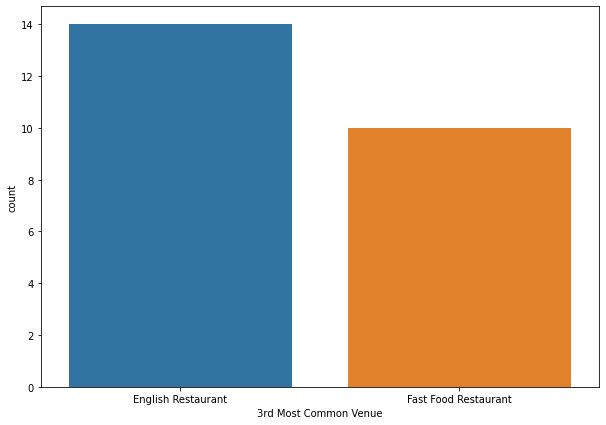

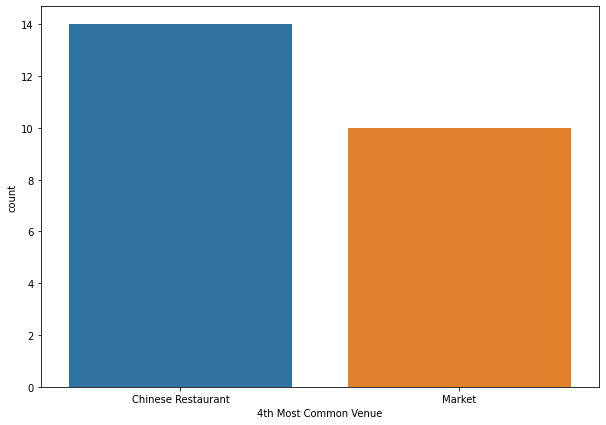

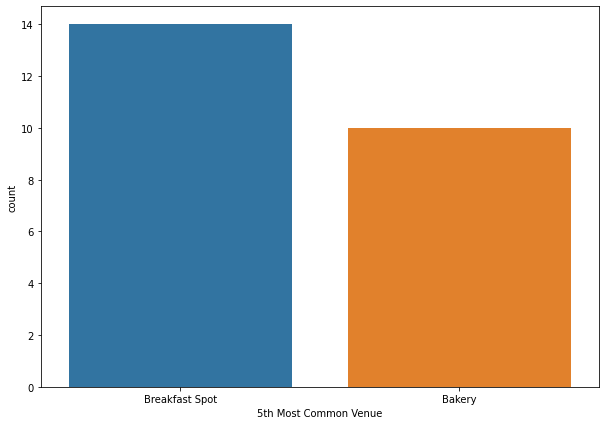

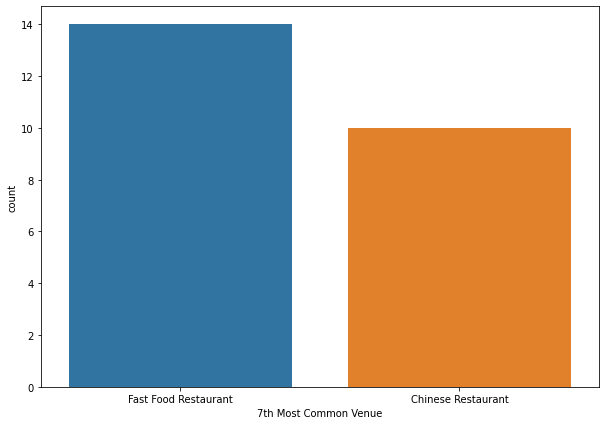

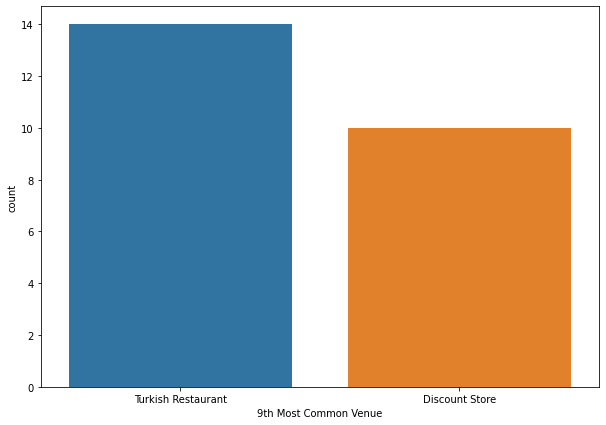

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

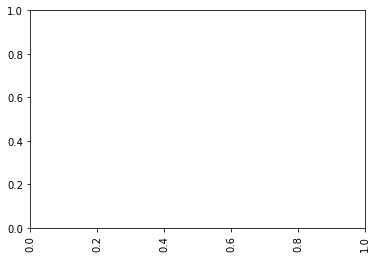

In [123]:
dpi = 200

for h in range(3, 8):
    plt.figure(figsize = (10,7))
    sns.countplot(data = st_cluster3, x = st_cluster3.iloc[:, h] )

plt.show()
plt.xticks(rotation = 90)

### Cluster 3 - Analysis
* #### The Boroughs include Upperclapton, Clapton park, Hackney Marshes
* #### Further clustering is based on Ranking of Similar Common venues this Burough --> places include Pub, English Restaurant, Chinese Restaurant,Breakfast Spot, Fast Food Restaurant

### Cluster 4 

In [124]:
st_cluster4 = strat_merged.loc[strat_merged['Cluster Labels'] == 3, strat_merged.columns[[0] + list(range(8, 14))]]
st_cluster4.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
284,"Manor Park, Little Ilford, Aldersbrook",3,Pub,Restaurant,Turkish Restaurant,Asian Restaurant,Dive Bar
285,"Manor Park, Little Ilford, Aldersbrook",3,Pub,Restaurant,Turkish Restaurant,Asian Restaurant,Dive Bar
286,"Manor Park, Little Ilford, Aldersbrook",3,Pub,Restaurant,Turkish Restaurant,Asian Restaurant,Dive Bar
287,"Manor Park, Little Ilford, Aldersbrook",3,Pub,Restaurant,Turkish Restaurant,Asian Restaurant,Dive Bar


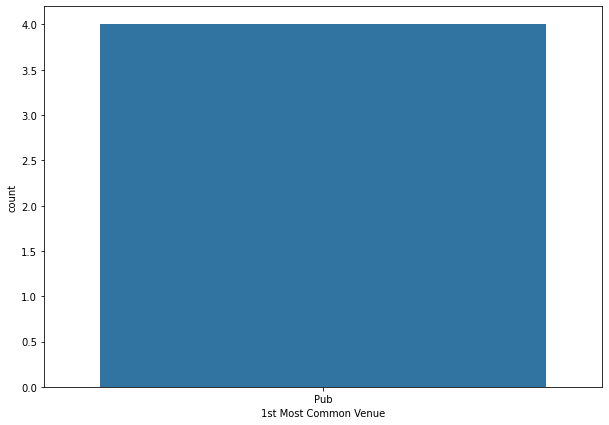

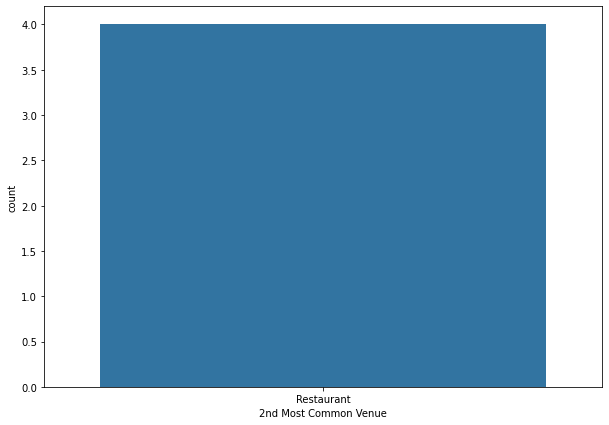

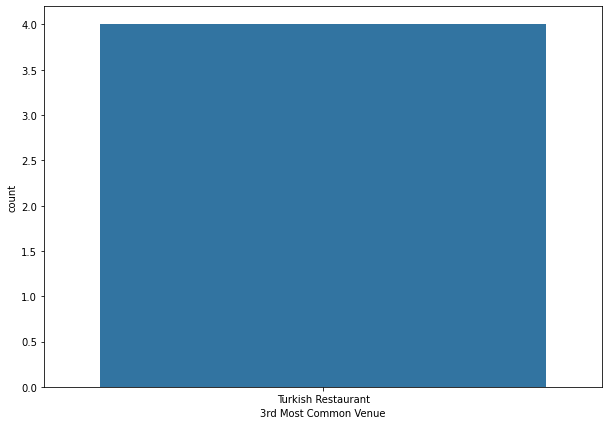

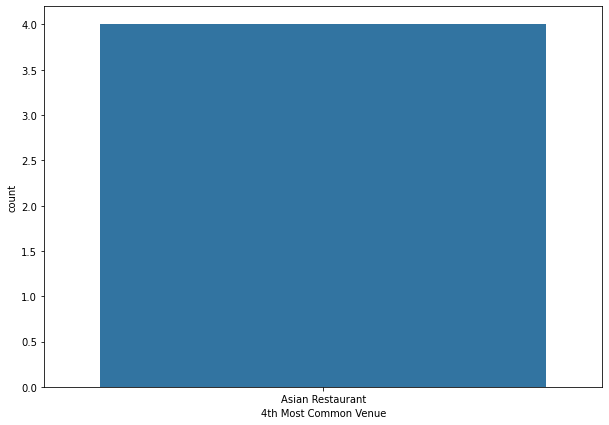

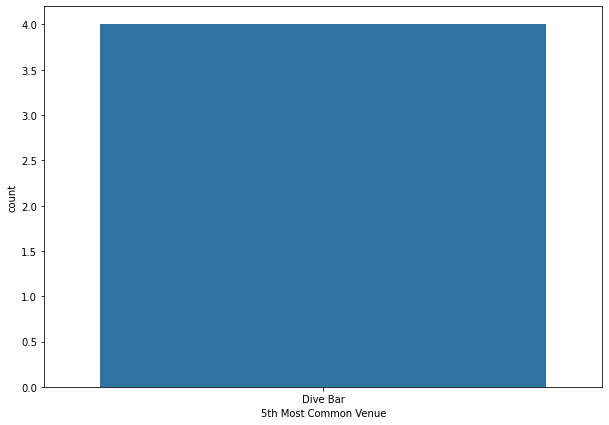

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

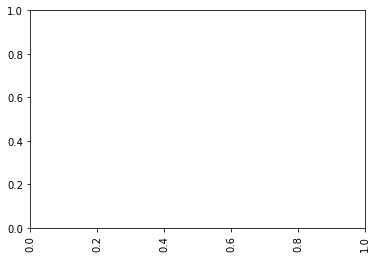

In [125]:
dpi = 200

for h in range(2, 7):
    plt.figure(figsize = (10,7))
    sns.countplot(data = st_cluster4, x = st_cluster4.iloc[:, h] )

plt.show()
plt.xticks(rotation = 90)

### Cluster 4 - analysis
* #### The cluster 4 neighborhood includes Manorpark, Little Ilford, Alders Brook
* #### This neighborhood has these venues in the **Top 5: Pub, Restaurant, Turkish, Asian restaurant, Dive bar**

### Cluster 5 - analysis

In [103]:
st_cluster5 = strat_merged.loc[strat_merged['Cluster Labels'] == 4, strat_merged.columns[[0] + list(range(8, 19))]]
st_cluster5.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
101,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",4,Pub,Bus Stop,Platform,Road,Burger Joint,Breakfast Spot,Light Rail Station,Bar,Chinese Restaurant,Metro Station
102,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",4,Pub,Bus Stop,Platform,Road,Burger Joint,Breakfast Spot,Light Rail Station,Bar,Chinese Restaurant,Metro Station
103,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",4,Pub,Bus Stop,Platform,Road,Burger Joint,Breakfast Spot,Light Rail Station,Bar,Chinese Restaurant,Metro Station
104,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",4,Pub,Bus Stop,Platform,Road,Burger Joint,Breakfast Spot,Light Rail Station,Bar,Chinese Restaurant,Metro Station
105,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",4,Pub,Bus Stop,Platform,Road,Burger Joint,Breakfast Spot,Light Rail Station,Bar,Chinese Restaurant,Metro Station


#### We will remove venues other than dining 

In [126]:
st_cluster5.drop(['2nd Most Common Venue', '3rd Most Common Venue','4th Most Common Venue', '7th Most Common Venue','10th Most Common Venue'], axis = 1, inplace = True)

In [127]:
st_cluster5.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,8th Most Common Venue,9th Most Common Venue
101,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",4,Pub,Burger Joint,Breakfast Spot,Bar,Chinese Restaurant
102,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",4,Pub,Burger Joint,Breakfast Spot,Bar,Chinese Restaurant
103,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",4,Pub,Burger Joint,Breakfast Spot,Bar,Chinese Restaurant
104,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",4,Pub,Burger Joint,Breakfast Spot,Bar,Chinese Restaurant
105,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",4,Pub,Burger Joint,Breakfast Spot,Bar,Chinese Restaurant


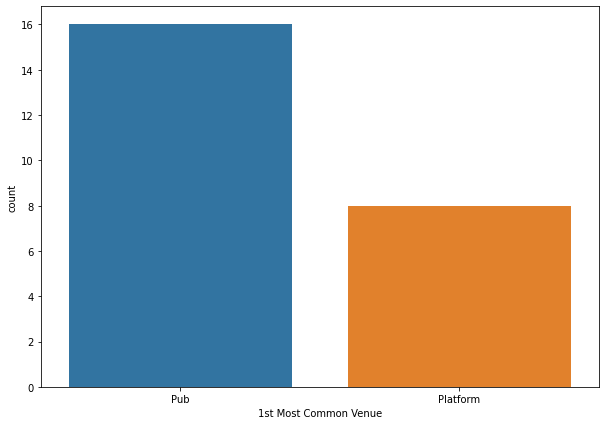

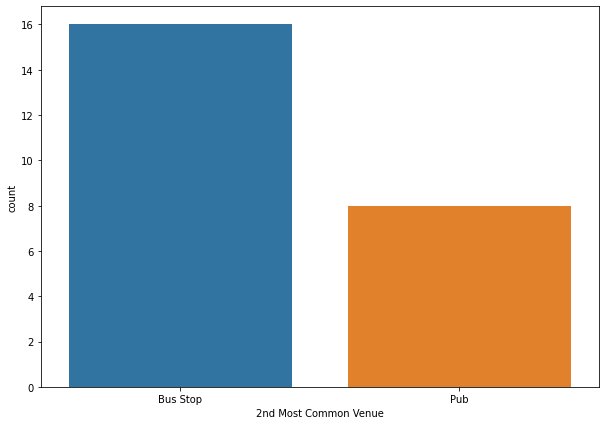

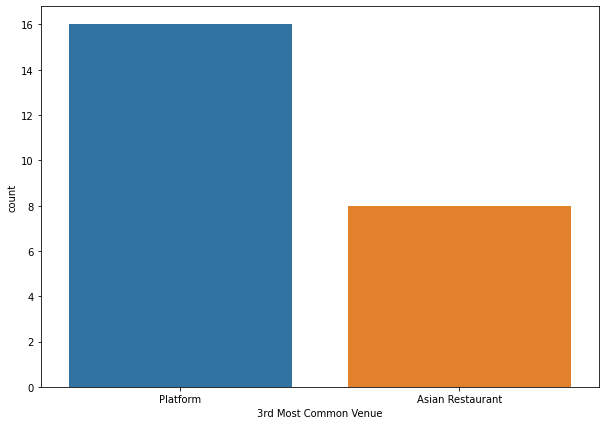

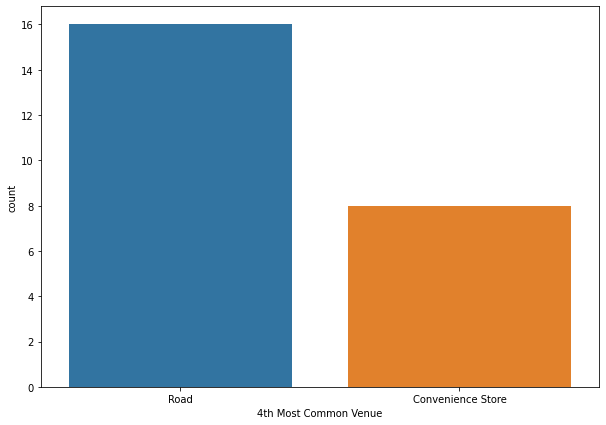

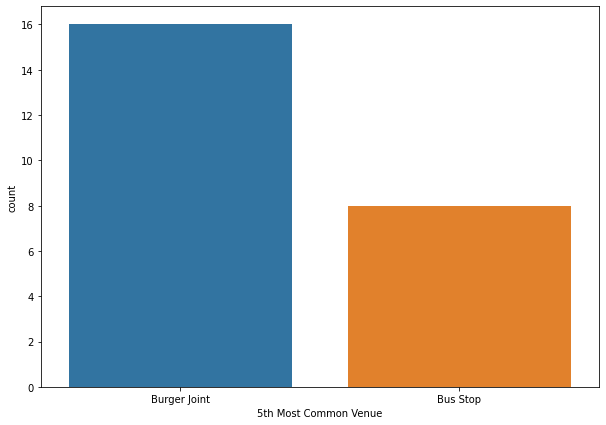

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

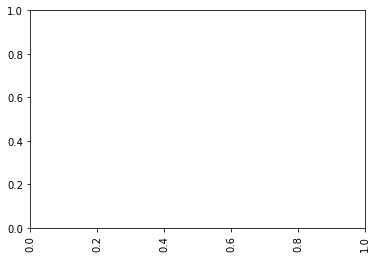

In [101]:
dpi = 200

for h in range(2, 7):
    plt.figure(figsize = (10,7))
    sns.countplot(data = st_cluster5, x = st_cluster5.iloc[:, h] )

plt.show()
plt.xticks(rotation = 90)

### Cluster 5 - analysis
* #### The cluster 5 neighborhood includes Mile End, Old Ford, Devons Road, Bow Road
* #### This neighborhood has these venues in the **Top 5: Pub, Burger Joint, Breakfast Spot, Bar, Chinese Restaurant**

### ***Location of Indian Cofee House Business details:***
* #### From above cluster analysis we can infer that,  only **cluster 2** have **cofee shop/ Cafe** in the Top5 as common avenue in locations: Hackney, Bethnal Green, Tower Hamlets, Haggerston, East Ham, Beckton, Cyprus

* #### cluster locations which contain **Indian Restaurants** are: **Cluster1** - Whitechapel, Rotherhithe, Snaresbrook, Wanstead, Cubitt Town, Canary Wharf, Stratford

* #### Cluster locations having **Fastfood corner** in them are: **Cluster 3** - Upperclapton, Clapton park, Hackney Marshes

* #### **Cluster 4** has **Asian Restaurants** in locations: Manorpark, Little Ilford, Alders Brook

* #### From above analysis on each cluster data - *we can conclude* on the **Location of the New Indian Coffee house as Cluster 5** in one of the neighborhoods below:

* #### **Mile End**
* #### **Old Ford**
* #### **Devons Road**
* #### **Bow Road**

In [130]:
strat_merged_cl5 = strat_merged[strat_merged['Cluster Labels']==4]
strat_merged_cl5.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
101,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",51.525,-0.026571,4ad9e432f964a520a31b21e3,The Coborn,51.526932,-0.030085,Pub,4,Pub,Bus Stop,Platform,Road,Burger Joint,Breakfast Spot,Light Rail Station,Bar,Chinese Restaurant,Metro Station
102,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",51.525,-0.026571,4ac518c3f964a52024a420e3,The Morgan Arms,51.527908,-0.030935,Bar,4,Pub,Bus Stop,Platform,Road,Burger Joint,Breakfast Spot,Light Rail Station,Bar,Chinese Restaurant,Metro Station
103,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",51.525,-0.026571,5769a02538faed0583028f43,Rusty Bike Pub,51.525351,-0.032734,Pub,4,Pub,Bus Stop,Platform,Road,Burger Joint,Breakfast Spot,Light Rail Station,Bar,Chinese Restaurant,Metro Station
104,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",51.525,-0.026571,4dffd1abc65b4967500146ea,Original Taste,51.527710,-0.022485,Burger Joint,4,Pub,Bus Stop,Platform,Road,Burger Joint,Breakfast Spot,Light Rail Station,Bar,Chinese Restaurant,Metro Station
105,"Mile End, Old Ford, Devons Road, Bow Road, Bow...",51.525,-0.026571,4c07ac0f8a81c9b6b98a2790,Little Driver,51.527766,-0.022212,Pub,4,Pub,Bus Stop,Platform,Road,Burger Joint,Breakfast Spot,Light Rail Station,Bar,Chinese Restaurant,Metro Station


In [131]:
# create map
map_clusters_strat1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(strat_merged_cl5['Neighborhood Latitude'], strat_merged_cl5['Neighborhood Longitude'], strat_merged_cl5['Neighborhood'], strat_merged_cl5['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,q
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_strat1)
       
map_clusters_strat1

### Above are the feasible locations for new **'Indian Cofee house'** business to be setup in East London considering the density of other Indian/ Asian Restaurant, coffee-shop locations in other neighborhood.